In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from FreqRespPy.data_search import get_target_file_list, open_target_file
from scipy import signal

In [2]:
def to_linear(x):
     return 10**(x / 10.0)    

In [3]:
def to_dB(x):
    return 10 * np.log10(x)

In [4]:
def mean_freq_response(target_df):
    target_df = target_df.apply(pd.to_numeric)
    
    target_df_lin = to_linear(target_df)
    row_means_lin = target_df_lin.mean(axis=1)
    row_means_sem = target_df_lin.sem(axis=1)
  #  plt.subplot(2,1,1)
  #  plt.ylabel('Mean Sigma')
  #  plt.hist(row_means_lin)
  #  plt.subplot(2,1,2)
  #  plt.ylabel('Sigma SEM')
  #  plt.hist(row_means_sem)
  #  plt.show()
    row_means = to_dB(row_means_lin)
    return [row_means_lin, row_means_sem]

In [5]:
data_directory = '/Users/kevinb/Documents/GitHub/FreqResp/data/'
data_files = get_target_file_list(data_directory)
print(data_files)

['FT_region_EV10_EVD_comp0_region2130.csv', 'FT_region_EV10_EVD_comp1_region2130.csv', 'FT_region_EV10_EVD_comp2_region2130.csv', 'FT_region_EV10_EVD_comp3_region2130.csv', 'FT_region_EV10_EVD_raw_region2130.csv', 'FT_region_EV9_EVD_comp0_region2130.csv', 'FT_region_EV9_EVD_comp1_region2130.csv', 'FT_region_EV9_EVD_comp2_region2130.csv', 'FT_region_EV9_EVD_comp3_region2130.csv', 'FT_region_EV9_EVD_raw_region2130.csv']


In [6]:
mean_response_output = []
mean_sem_output = []

for file in data_files:
    meta, df = open_target_file(data_directory, file)
    #   print(df)
    #   print(df.dtypes)
    
    mean_response, mean_sem = mean_freq_response(df)
    mean_response_output.append(mean_response)
    mean_sem_output.append(mean_sem)
    

In [7]:
#mean_response_output

In [8]:
df_output_mean = pd.concat(mean_response_output, axis=1)
df_output_sem = pd.concat(mean_sem_output, axis=1)

In [9]:
type(df_output_mean)
df_output_mean.shape
df_output_mean.columns.values
df_output_mean.columns = [file.replace(' ', '_') for file in data_files]

df_output_sem.shape
df_output_sem.columns.values
df_output_sem.columns = [file.replace(' ', '_') for file in data_files]

In [10]:
data_files = [file.replace(' ', '_') for file in data_files]
data_files = [file[:-4] for file in data_files if file.endswith('.csv')]
data_files = [file[10:] for file in data_files if file.startswith('FT_region_')]

In [11]:
df_output_mean.columns = data_files
df_output_mean.columns

Index(['EV10_EVD_comp0_region2130', 'EV10_EVD_comp1_region2130',
       'EV10_EVD_comp2_region2130', 'EV10_EVD_comp3_region2130',
       'EV10_EVD_raw_region2130', 'EV9_EVD_comp0_region2130',
       'EV9_EVD_comp1_region2130', 'EV9_EVD_comp2_region2130',
       'EV9_EVD_comp3_region2130', 'EV9_EVD_raw_region2130'],
      dtype='object')

In [12]:
df_output_sem.columns = data_files
df_output_sem.columns

Index(['EV10_EVD_comp0_region2130', 'EV10_EVD_comp1_region2130',
       'EV10_EVD_comp2_region2130', 'EV10_EVD_comp3_region2130',
       'EV10_EVD_raw_region2130', 'EV9_EVD_comp0_region2130',
       'EV9_EVD_comp1_region2130', 'EV9_EVD_comp2_region2130',
       'EV9_EVD_comp3_region2130', 'EV9_EVD_raw_region2130'],
      dtype='object')

In [13]:
target1_mean = 10*np.log10(df_output_mean.iloc[:,0])   # Fish1
target1_low_sem = 10*np.log10(df_output_mean.iloc[:,0] - df_output_sem.iloc[:,0])   
target1_upp_sem = 10*np.log10(df_output_mean.iloc[:,0] + df_output_sem.iloc[:,0])  

target2_mean = 10*np.log10(df_output_mean.iloc[:,1])   # Fish1 
target2_low_sem = 10*np.log10(df_output_mean.iloc[:,1] - df_output_sem.iloc[:,1])  
target2_upp_sem = 10*np.log10(df_output_mean.iloc[:,1] + df_output_sem.iloc[:,1])  

target3_mean= 10*np.log10(df_output_mean.iloc[:,2])   # Fish2
target3_low_sem= 10*np.log10(df_output_mean.iloc[:,2] - df_output_sem.iloc[:,2])   
target3_upp_sem= 10*np.log10(df_output_mean.iloc[:,2] + df_output_sem.iloc[:,2])  

target4_mean= 10*np.log10(df_output_mean.iloc[:,3])   # Fish2
target4_low_sem= 10*np.log10(df_output_mean.iloc[:,3] - df_output_sem.iloc[:,3]) 
target4_upp_sem= 10*np.log10(df_output_mean.iloc[:,3] + df_output_sem.iloc[:,3])

target5_mean = 10*np.log10(df_output_mean.iloc[:,4])   # Fish1
target5_low_sem = 10*np.log10(df_output_mean.iloc[:,4] - df_output_sem.iloc[:,4])   
target5_upp_sem = 10*np.log10(df_output_mean.iloc[:,4] + df_output_sem.iloc[:,4])  

target6_mean = 10*np.log10(df_output_mean.iloc[:,5])   # Fish1 
target6_low_sem = 10*np.log10(df_output_mean.iloc[:,5] - df_output_sem.iloc[:,5])  
target6_upp_sem = 10*np.log10(df_output_mean.iloc[:,5] + df_output_sem.iloc[:,5])  

target7_mean= 10*np.log10(df_output_mean.iloc[:,6])   # Fish2
target7_low_sem= 10*np.log10(df_output_mean.iloc[:,6] - df_output_sem.iloc[:,6])   
target7_upp_sem= 10*np.log10(df_output_mean.iloc[:,6] + df_output_sem.iloc[:,6])  

target8_mean= 10*np.log10(df_output_mean.iloc[:,7])   # Fish2
target8_low_sem= 10*np.log10(df_output_mean.iloc[:,7] - df_output_sem.iloc[:,7]) 
target8_upp_sem= 10*np.log10(df_output_mean.iloc[:,7] + df_output_sem.iloc[:,7])

target9_mean= 10*np.log10(df_output_mean.iloc[:,8])   # Fish2
target9_low_sem= 10*np.log10(df_output_mean.iloc[:,8] - df_output_sem.iloc[:,8]) 
target9_upp_sem= 10*np.log10(df_output_mean.iloc[:,8] + df_output_sem.iloc[:,8])

target10_mean= 10*np.log10(df_output_mean.iloc[:,9])   # Fish2
target10_low_sem= 10*np.log10(df_output_mean.iloc[:,9] - df_output_sem.iloc[:,9]) 
target10_upp_sem= 10*np.log10(df_output_mean.iloc[:,9] + df_output_sem.iloc[:,9])

freq=df.index

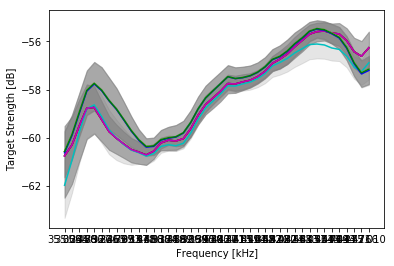

In [14]:
plt.xlabel('Frequency [kHz]')
plt.ylabel('Target Strength [dB]')

plt.plot(freq,target1_mean, '-', color='b')
plt.fill_between(freq, target1_low_sem, target1_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target2_mean, '-', color='g')
plt.fill_between(freq, target2_low_sem, target2_upp_sem,
                 color='gray', alpha=0.2)

plt.plot(freq,target3_mean, '-', color='r')
plt.fill_between(freq, target3_low_sem, target3_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target4_mean, '-', color='c')
plt.fill_between(freq, target4_low_sem, target4_upp_sem,
                 color='gray', alpha=0.2)

plt.plot(freq,target5_mean, '-', color='m')
plt.fill_between(freq, target5_low_sem, target5_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target6_mean, '-', color='y')
plt.fill_between(freq, target6_low_sem, target6_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target7_mean, '-', color='k')
plt.fill_between(freq, target7_low_sem, target7_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target8_mean, '-', color='w')
plt.fill_between(freq, target8_low_sem, target8_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target9_mean, '-', color='b')
plt.fill_between(freq, target9_low_sem, target9_upp_sem,
                 color='gray', alpha=0.2)


plt.plot(freq,target10_mean, '-', color='g')
plt.fill_between(freq, target10_low_sem, target10_upp_sem,
                 color='gray', alpha=0.2)

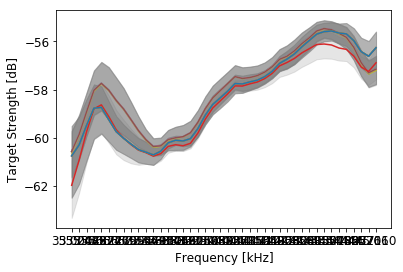

In [15]:
## need to integrate file names into this to loop across fish tracks
i = 0
while i < len(data_files):
    plt.rcParams["font.size"] = 12
    plt.plot(freq, (10*np.log10(df_output_mean.iloc[:,i])),zorder=len(data_files)-i) 
#    plt.plot (freq, (10*np.log10(df_output_mean.iloc[:,i] - df_output_sem.iloc[:,i])))
    plt.fill_between(freq, 10*np.log10(df_output_mean.iloc[:,i] - df_output_sem.iloc[:,i]),
                     10*np.log10(df_output_mean.iloc[:,i] + df_output_sem.iloc[:,i]),
                     color='gray', alpha=0.2)          
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Target Strength [dB]')
#   print (i)
    i = i + 1
   

In [16]:
df_output_sem.columns

Index(['EV10_EVD_comp0_region2130', 'EV10_EVD_comp1_region2130',
       'EV10_EVD_comp2_region2130', 'EV10_EVD_comp3_region2130',
       'EV10_EVD_raw_region2130', 'EV9_EVD_comp0_region2130',
       'EV9_EVD_comp1_region2130', 'EV9_EVD_comp2_region2130',
       'EV9_EVD_comp3_region2130', 'EV9_EVD_raw_region2130'],
      dtype='object')

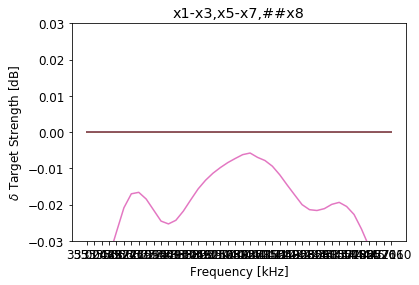

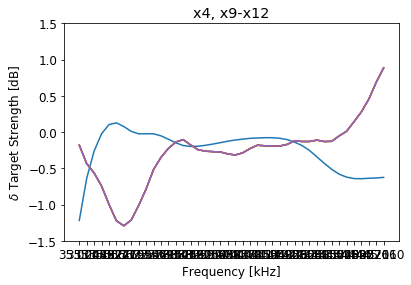

In [17]:
a=10*np.log10(df_output_mean.iloc[:,0])   #EV10_EVD_comp0
b=10*np.log10(df_output_mean.iloc[:,1])   #EV10_EVD_comp1
c=10*np.log10(df_output_mean.iloc[:,2])   #EEV10_EVD_comp2
d=10*np.log10(df_output_mean.iloc[:,3])   #EV10_EVD_comp3
e=10*np.log10(df_output_mean.iloc[:,4])   #EV10_EVD_raw
f=10*np.log10(df_output_mean.iloc[:,5])   #EV9_EVD_comp0
g=10*np.log10(df_output_mean.iloc[:,6])   #EV9_EVD_comp1
h=10*np.log10(df_output_mean.iloc[:,7])   #EV9_EVD_comp2
i=10*np.log10(df_output_mean.iloc[:,8])   #EV9_EVD_comp3
j=10*np.log10(df_output_mean.iloc[:,9])   #EV9_EVD_raw


# No diffs b/w Comp0 and Comp1 
x1= a-e     #EV10_EVD_comp0 - EV10_EVD_raw
x2= b-e     #EV10_EVD_comp1 - EV10_EVD_raw
x3= c-e     #EEV10_EVD_comp2 - EV10_EVD_raw    
x4= d-e     #EEV10_EVD_comp3 - EV10_EVD_raw    
x5= f-j     #EV9_EVD_comp0 - EV9_EVD_raw
x6= g-j     #EV9_EVD_comp1 - EV9_EVD_raw
x7= h-j     #EV9_EVD_comp2 -  EV9_EVD_raw     
x8= i-j     #EV9_EVD_comp3 - EV9_EVD_raw      
x9= e-j     #EV10_EVD_raw - EV9_EVD_raw       
x10= a-f    #EV10_EVD_comp0 - EV9_EVD_comp0   
x11= b-g    #EV10_EVD_comp1 - EV9_EVD_comp1   
x12= c-h    #EV10_EVD_comp2 - EV9_EVD_comp2   
x13= d-i    #EV10_EVD_comp3 - EV9_EVD_comp3
x14= e-j    #EV10_EVD_raw - EV9_EVD_raw

#out=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14]
out=[x10,x11,x12,x9]
outz=pd.DataFrame(out)


# X1-X3,xX5-X7, x8
#plt.subplot(2,2,1)
plt.figure(1)
plt.title('x1-x3,x5-x7,##x8')
out1=[x1,x2,x3,x5,x6,x7,x8]
outz1=pd.DataFrame(out1)
m = 0
while m < len(outz1):
   plt.rcParams["font.size"] = 12
   plt.plot(freq, outz1.iloc[m,:]) 
   plt.xlabel('Frequency [kHz]')
   plt.ylim(-0.03,0.03)
   plt.ylabel('$\delta$ Target Strength [dB]')
   m = m + 1

# X4, X9-x12
#plt.subplot(2,2,3)
plt.figure(3)
plt.title('x4, x9-x12')
out4=[x4,x9,x10,x11,x12]
outz4=pd.DataFrame(out4)
m = 0
while m < len(outz4):
   plt.rcParams["font.size"] = 12
   plt.plot(freq, outz4.iloc[m,:]) 
   plt.xlabel('Frequency [kHz]')
   plt.ylim(-1.5,1.5)
   plt.ylabel('$\delta$ Target Strength [dB]')
   m = m + 1


In [18]:
outz

Target_index,35.000,35.244,35.488,35.732,35.977,36.221,36.465,36.709,36.953,37.197,...,42.813,43.057,43.301,43.545,43.789,44.033,44.277,44.521,44.766,45.010
0,-0.181436,-0.435566,-0.564907,-0.744295,-0.997602,-1.223913,-1.293384,-1.213097,-1.012431,-0.785044,...,-0.110908,-0.130786,-0.127196,-0.053016,0.010651,0.141709,0.279226,0.453947,0.687275,0.886560
1,-0.181436,-0.435566,-0.564907,-0.744295,-0.997602,-1.223913,-1.293384,-1.213097,-1.012431,-0.785044,...,-0.110908,-0.130786,-0.127196,-0.053016,0.010651,0.141709,0.279226,0.453947,0.687275,0.886560
2,-0.181436,-0.435566,-0.564907,-0.744295,-0.997602,-1.223914,-1.293384,-1.213097,-1.012431,-0.785044,...,-0.110908,-0.130786,-0.127196,-0.053016,0.010651,0.141709,0.279226,0.453947,0.687275,0.886561
3,-0.181436,-0.435566,-0.564907,-0.744295,-0.997602,-1.223913,-1.293384,-1.213097,-1.012431,-0.785044,...,-0.110908,-0.130786,-0.127196,-0.053016,0.010651,0.141709,0.279226,0.453947,0.687275,0.886560
